## RAG System Using Llama2 With Hugging Face

In [2]:
!pip install pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 6.9 MB/s eta 0:00:00


In [3]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00


In [4]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 5.0 MB/s eta 0:00:00


In [5]:
!pip install deprecated==1.2.14 dirtyjson==1.0.8 h11==0.14.0 httpcore==1.0.2 httpx==0.26.0 llama_index==0.9.40 openai==1.10.0 tiktoken==0.5.2 typing-extensions==4.9.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.1/225.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: httpcore
    Found existing installation: httpcore 1.0.5
    Uninstalling httpcore-1.0.5:
      Successfully uninstalled httpcore-1.0.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.27.2
    Uninstalling httpx-0.27.2:
      Successfully uninstalled httpx-0.27.2
ERROR: pip's depend

In [6]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.2 MB/s eta 0:00:00


In [7]:
from llama_index import VectorStoreIndex,SimpleDirectoryReader,ServiceContext
from llama_index.llms import HuggingFaceLLM
from llama_index.prompts.prompts import SimpleInputPrompt


In [9]:
documents=SimpleDirectoryReader("/content/data").load_data()
documents

[Document(id_='3b06b785-b86f-43a8-b7b3-ae364ac2bca2', embedding=None, metadata={'page_label': '1', 'file_name': '1972-savage-foundationsofstatistics.pdf', 'file_path': '/content/data/1972-savage-foundationsofstatistics.pdf', 'file_type': 'application/pdf', 'file_size': 28637068, 'creation_date': '2024-09-21', 'last_modified_date': '2024-09-21', 'last_accessed_date': '2024-09-21'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='The Foundations\notfStatistics\nLEONARD J.SAVAGE\nLate Eugene Higgins Professor ofStatistics\nYale University\nSECOND REVISED EDITION\nDOVER PUBLICATIONS, INC.\nNEW YORK\n', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n'),
 Document(i

In [10]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [11]:
system_prompt="""
You are a Q&A assistant. Your goal is to answer questions as
accurately as possible based on the instructions and context provided.
"""
## Default format supportable by LLama2
query_wrapper_prompt = SimpleInputPrompt("<|USER|>{query_str}<|ASSISTANT|>")

In [12]:
import torch
llm = HuggingFaceLLM(
    context_window=4096,
    max_new_tokens=256,
    system_prompt=system_prompt,
    query_wrapper_prompt=query_wrapper_prompt,
    generate_kwargs={"temperature": 0.0, "do_sample": False},
    tokenizer_name="meta-llama/Llama-2-7b-chat-hf",
    model_name="meta-llama/Llama-2-7b-chat-hf",
    device_map="auto",
    # uncomment this if using CUDA to reduce memory usage
    model_kwargs={"torch_dtype": torch.float16 , "load_in_8bit":True}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [13]:
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from llama_index import ServiceContext
from llama_index.embeddings import LangchainEmbedding

embed_model=LangchainEmbedding(
    HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
<ipython-input-13-ffac2e45ddeb>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [15]:
service_context=ServiceContext.from_defaults(
    chunk_size=512,
    llm=llm,
    embed_model=embed_model
)

In [16]:
service_context

ServiceContext(llm_predictor=LLMPredictor(system_prompt=None, query_wrapper_prompt=None, pydantic_program_mode=<PydanticProgramMode.DEFAULT: 'default'>), prompt_helper=PromptHelper(context_window=4096, num_output=256, chunk_overlap_ratio=0.1, chunk_size_limit=None, separator=' '), embed_model=LangchainEmbedding(model_name='sentence-transformers/all-mpnet-base-v2', embed_batch_size=10, callback_manager=<llama_index.callbacks.base.CallbackManager object at 0x7d17cde95510>), transformations=[SentenceSplitter(include_metadata=True, include_prev_next_rel=True, callback_manager=<llama_index.callbacks.base.CallbackManager object at 0x7d17cde95510>, id_func=<function default_id_func at 0x7d18fba05870>, chunk_size=512, chunk_overlap=200, separator=' ', paragraph_separator='\n\n\n', secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?')], llama_logger=<llama_index.logger.base.LlamaLogger object at 0x7d18f46ee8f0>, callback_manager=<llama_index.callbacks.base.CallbackManager object at 0x7d17cde95510>)

In [17]:
index=VectorStoreIndex.from_documents(documents,service_context=service_context)

In [19]:
index

In [20]:
query_engine=index.as_query_engine()

In [21]:
response = query_engine.query("How many diagonals can you draw in a decagon?")


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


In [22]:
print(response)

A decagon has 10 sides, and each side can be connected to 3 other sides, so you can draw 30 diagonals in a decagon.


In [23]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'val': 'data/val-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/rvv-karma/Math-QA/" + splits["train"])

In [24]:
df

,topic,sub_topic,question,answer
0,Algebra,Evaluating expressions,Solve the expression 2x + 5 for x when x = 3.,To solve the expression 2x + 5 for x when x = ...
1,Algebra,Evaluating expressions,Evaluate the expression when x = 2 and y = 5:\...,To evaluate the expression when x = 2 and y = ...
2,Algebra,Evaluating expressions,Evaluate the expression 2x^2 - 3x + 5 when x = 4.,To evaluate the expression 2x^2 - 3x + 5 when ...
3,Algebra,Evaluating expressions,"If x = 4 and y = 2, evaluate the expression 3x...","Given x = 4 and y = 2, we can substitute these..."
4,Algebra,Evaluating expressions,"If x = 3 and y = 4, evaluate the expression 2x...","To evaluate the expression 2x² - 3y + 5, we wi..."
...,...,...,...,...
34995,Trigonometry,Using trigonometry to solve real-world problems,"A flagpole stands vertically on level ground, ...","To find the height of the flagpole, we can use..."
34996,Trigonometry,Using trigonometry to solve real-world problems,A ladder leaning against a wall makes an angle...,We can use the trigonometric function to solve...
34997,Trigonometry,Using trigonometry to solve real-world problems,A flagpole stands vertically on a hillside tha...,To find the length of the flagpole's shadow on...
34998,Trigonometry,Using trigonometry to solve real-world problems,A student is standing 50 meters away from the ...,"To find the height of the building, we can use..."


In [35]:
# Filter the DataFrame by the 'Statistics' topic
filtered_df = df[df['topic'] == 'Statistics']

# Sample 2 rows from the filtered DataFrame
test_df = filtered_df.sample(n=30)

# Initialize a list to store the answers
answers = []

# Iterate over each row in the DataFrame
for index, row in test_df.iterrows():
    # Get the question
    question = row['question']

    # Use the RAG model to generate an answer
    answer = query_engine.query(question)

    # Store the generated answer
    answers.append(answer)

# Add the answers to the DataFrame
test_df['generated_answer'] = answers

# Display the updated DataFrame
print(test_df)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


            topic                     sub_topic  \
31580  Statistics        Monte Carlo simulation   
31825  Statistics     Probability distributions   
30986  Statistics         Central limit theorem   
31277  Statistics         Discriminant analysis   
31618  Statistics         Multivariate analysis   
31553  Statistics        Monte Carlo simulation   
31203  Statistics                   Data mining   
31771  Statistics  Principal component analysis   
31070  Statistics              Cluster analysis   
32016  Statistics           Sampling techniques   
31418  Statistics            Hypothesis testing   
31125  Statistics          Confidence intervals   
31030  Statistics              Cluster analysis   
32028  Statistics           Sampling techniques   
31610  Statistics         Multivariate analysis   
31481  Statistics                 Markov chains   
31528  Statistics        Monte Carlo simulation   
31749  Statistics  Principal component analysis   
31974  Statistics           Sam

In [36]:
test_df

,topic,sub_topic,question,answer,generated_answer
31580,Statistics,Monte Carlo simulation,A company wants to determine the expected numb...,To estimate the mean number of days it will ta...,\nTo estimate the mean number of days it will ...
31825,Statistics,Probability distributions,Suppose the length of time it takes a student ...,To find the probability that a randomly select...,The probability that a randomly selected stude...
30986,Statistics,Central limit theorem,A manufacturer produces light bulbs with a mea...,"To solve this problem, we can use the Central ...",The probability that the average lifetime of t...
31277,Statistics,Discriminant analysis,"In discriminant analysis, a student is given a...","To perform discriminant analysis, we first nee...",\nThank you for asking! Based on the context i...
31618,Statistics,Multivariate analysis,Here's a precise numerical problem for a math ...,To find the covariance and correlation coeffic...,\n\nPlease provide the answer in a clear and c...
31553,Statistics,Monte Carlo simulation,Suppose you are simulating the roll of a six-s...,To find the probability of rolling at least on...,To calculate the probability of rolling at lea...
31203,Statistics,Data mining,Suppose we have a dataset containing the ages ...,To find the average age of the students in the...,The average age of the students in the classro...
31771,Statistics,Principal component analysis,What is the principal component for a dataset ...,"To find the principal component, we first need...",The principal component for the given covarian...
31070,Statistics,Cluster analysis,A retail store recorded the sales from 10 diff...,"To perform k-means clustering with 3 clusters,...","Sure, I can help you with that! Based on the c..."
32016,Statistics,Sampling techniques,A company wants to determine the average salar...,To calculate the probability that one particul...,The probability of selecting a particular empl...


In [37]:
test_df.drop(columns="topic", inplace=True)

In [38]:
test_df.rename(columns={'sub_topic': 'context'}, inplace=True)

In [39]:
test_df

,context,question,answer,generated_answer
31580,Monte Carlo simulation,A company wants to determine the expected numb...,To estimate the mean number of days it will ta...,\nTo estimate the mean number of days it will ...
31825,Probability distributions,Suppose the length of time it takes a student ...,To find the probability that a randomly select...,The probability that a randomly selected stude...
30986,Central limit theorem,A manufacturer produces light bulbs with a mea...,"To solve this problem, we can use the Central ...",The probability that the average lifetime of t...
31277,Discriminant analysis,"In discriminant analysis, a student is given a...","To perform discriminant analysis, we first nee...",\nThank you for asking! Based on the context i...
31618,Multivariate analysis,Here's a precise numerical problem for a math ...,To find the covariance and correlation coeffic...,\n\nPlease provide the answer in a clear and c...
31553,Monte Carlo simulation,Suppose you are simulating the roll of a six-s...,To find the probability of rolling at least on...,To calculate the probability of rolling at lea...
31203,Data mining,Suppose we have a dataset containing the ages ...,To find the average age of the students in the...,The average age of the students in the classro...
31771,Principal component analysis,What is the principal component for a dataset ...,"To find the principal component, we first need...",The principal component for the given covarian...
31070,Cluster analysis,A retail store recorded the sales from 10 diff...,"To perform k-means clustering with 3 clusters,...","Sure, I can help you with that! Based on the c..."
32016,Sampling techniques,A company wants to determine the average salar...,To calculate the probability that one particul...,The probability of selecting a particular empl...


In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Basic preprocessing: ensure all entries are strings
for column in ['context', 'question', 'answer', 'generated_answer']:
    test_df[column] = test_df[column].astype(str).str.lower()

# Debugging: Print the initial DataFrame
print("Initial DataFrame:")
print(test_df)

# Combine the relevant columns for vectorization
combined_series = pd.concat([test_df['context'], test_df['answer'], test_df['generated_answer']], ignore_index=True)

# Debugging: Print the combined series
print("\nCombined Series for Vectorization:")
print(combined_series)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(combined_series)
vectors_array = vectors.toarray()

# Debugging: Print the vectors
print("\nTF-IDF Vectors:")
print(vectors_array)

# Split the vectors
num_rows = len(test_df)
context_vectors = vectors_array[:num_rows]
answer_vectors = vectors_array[num_rows:2*num_rows]
generated_vectors = vectors_array[2*num_rows:]

# Ensure that the vectors are correctly sized
assert len(context_vectors) == num_rows, "Mismatch in context vectors length"
assert len(answer_vectors) == num_rows, "Mismatch in answer vectors length"
assert len(generated_vectors) == num_rows, "Mismatch in generated vectors length"

# Debugging: Print the split vectors
print("\nContext Vectors:")
print(context_vectors)
print("\nAnswer Vectors:")
print(answer_vectors)
print("\nGenerated Vectors:")
print(generated_vectors)

# Calculate similarities
faithfulness = [cosine_similarity([context_vectors[i]], [generated_vectors[i]])[0][0] for i in range(num_rows)]
answer_relevancy = [cosine_similarity([answer_vectors[i]], [generated_vectors[i]])[0][0] for i in range(num_rows)]

# Add similarities to DataFrame
test_df['faithfulness'] = faithfulness
test_df['answer_relevancy'] = answer_relevancy

# Debugging: Print the DataFrame with similarities
print("\nDataFrame with Similarities:")
print(test_df)

# Calculate context recall and precision
def compute_recall_precision(context, generated):
    context_terms = set(context.split())
    generated_terms = set(generated.split())

    common_terms = context_terms.intersection(generated_terms)

    recall = len(common_terms) / len(context_terms) if len(context_terms) > 0 else 0
    precision = len(common_terms) / len(generated_terms) if len(generated_terms) > 0 else 0

    return recall, precision

# Using try-except block to capture indexing issues
context_recall = []
context_precision = []

for i in range(num_rows):
    try:
        recall, precision = compute_recall_precision(test_df['context'].iloc[i], test_df['generated_answer'].iloc[i])
        context_recall.append(recall)
        context_precision.append(precision)
    except KeyError as e:
        print(f"KeyError at index {i}: {e}")

test_df['context_recall'] = context_recall
test_df['context_precision'] = context_precision

# Calculate answer correctness
threshold = 0.8
test_df['answer_correctness'] = test_df['answer_relevancy'] >= threshold

# Final DataFrame output
print("\nFinal DataFrame with all metrics:")
print(test_df)


Initial DataFrame:
                            context  \
31580        monte carlo simulation   
31825     probability distributions   
30986         central limit theorem   
31277         discriminant analysis   
31618         multivariate analysis   
31553        monte carlo simulation   
31203                   data mining   
31771  principal component analysis   
31070              cluster analysis   
32016           sampling techniques   
31418            hypothesis testing   
31125          confidence intervals   
31030              cluster analysis   
32028           sampling techniques   
31610         multivariate analysis   
31481                 markov chains   
31528        monte carlo simulation   
31749  principal component analysis   
31974           sampling techniques   
31990           sampling techniques   
31567        monte carlo simulation   
32147          time series analysis   
31912           regression analysis   
31702             outlier detection   
30889 

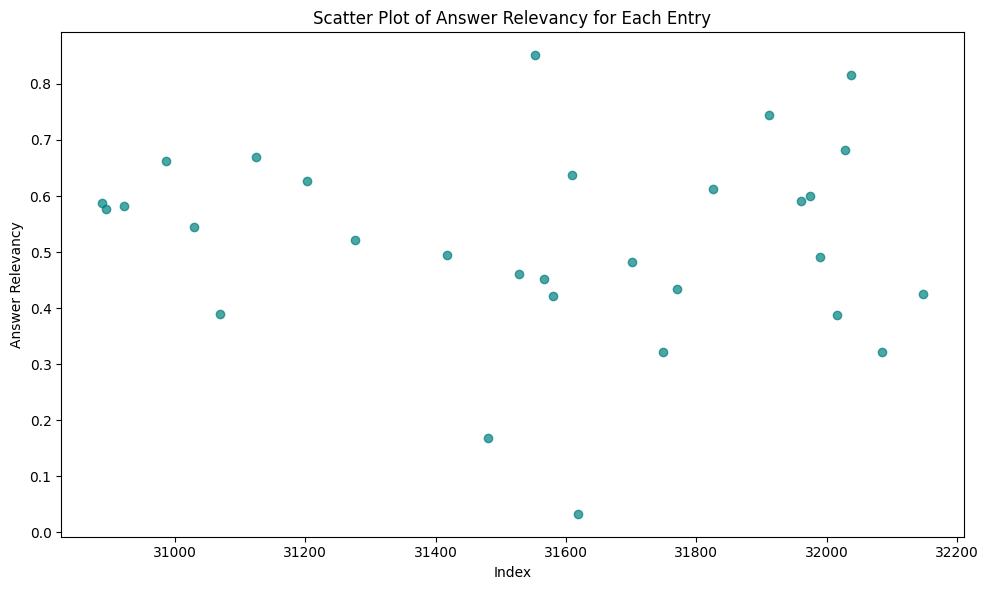

In [41]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Scatter plot 'answer_relevancy'
plt.scatter(test_df.index, test_df['answer_relevancy'], color='teal', alpha=0.7, marker='o')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Answer Relevancy')
plt.title('Scatter Plot of Answer Relevancy for Each Entry')

# Display the plot
plt.tight_layout()
plt.show()




In [42]:
# Calculate the overall performance
average_faithfulness = test_df['faithfulness'].mean()
average_answer_relevancy = test_df['answer_relevancy'].mean()
average_context_recall = test_df['context_recall'].mean()
average_context_precision = test_df['context_precision'].mean()
accuracy_answer_correctness = test_df['answer_correctness'].mean()

# Print the overall performance metrics
print("\nOverall Performance Metrics:")
print(f"Average Faithfulness: {average_faithfulness:.4f}")
print(f"Average Answer Relevancy: {average_answer_relevancy:.4f}")
print(f"Average Context Recall: {average_context_recall:.4f}")
print(f"Average Context Precision: {average_context_precision:.4f}")
print(f"Answer Correctness Accuracy: {accuracy_answer_correctness:.4f}")

# If you want a performance summary in percentage terms, you could format them as such:
performance_summary = {
    'Average Faithfulness (%)': average_faithfulness * 100,
    'Average Answer Relevancy (%)': average_answer_relevancy * 100,
    'Average Context Recall (%)': average_context_recall * 100,
    'Average Context Precision (%)': average_context_precision * 100,
    'Answer Correctness Accuracy (%)': accuracy_answer_correctness * 100
}

# Print the performance summary as percentages
print("\nPerformance Summary (in %):")
for metric, value in performance_summary.items():
    print(f"{metric}: {value:.2f}%")



Overall Performance Metrics:
Average Faithfulness: 0.1031
Average Answer Relevancy: 0.5196
Average Context Recall: 0.4222
Average Context Precision: 0.0194
Answer Correctness Accuracy: 0.0667

Performance Summary (in %):
Average Faithfulness (%): 10.31%
Average Answer Relevancy (%): 51.96%
Average Context Recall (%): 42.22%
Average Context Precision (%): 1.94%
Answer Correctness Accuracy (%): 6.67%
